In [5]:
from robyn.modeling.clustering.clustering_config import ClusteringConfig, ClusterBy
from robyn.modeling.clustering.cluster_builder import ClusterBuilder
import pandas as pd
import json
from typing import Dict, Any, List
import numpy as np
from datetime import datetime, timedelta
from robyn.data.entities.mmmdata import MMMData
from robyn.modeling.entities.modeloutputs import ModelOutputs, Trial
from robyn.modeling.entities.pareto_result import ParetoResult
from robyn.data.entities.enums import DependentVarType, PaidMediaSigns, OrganicSigns, ContextSigns

from robyn.tutorials.utils.data_mapper import import_output_collect, load_data_from_json


In [6]:

import pickle
# load the variable from the file
with open("pareto_result.pkl", "rb") as f:
    pareto_result: ParetoResult = pickle.load(f)
with open("mmmdata.pkl", "rb") as f:
    mmm_data = pickle.load(f)


In [7]:
cluster_builder = ClusterBuilder(pareto_result=pareto_result)

2024-11-04 22:01:19 - robyn.modeling.clustering.cluster_builder - INFO - Initializing ClusterBuilder


In [8]:
configs = ClusteringConfig(
    dep_var_type= DependentVarType(mmm_data.mmmdata_spec.dep_var_type),
    cluster_by = ClusterBy.HYPERPARAMETERS,
    max_clusters = 30,
    min_clusters = 3,
    weights=[1.0, 1.0, 1.0]
)
cluster_results  = cluster_builder.cluster_models(configs)

2024-11-04 22:01:19 - robyn.modeling.clustering.cluster_builder - INFO - Ignored features: nrmse_test, nrmse_val, nrmse_train, nrmse, mape, solID, decomp.rssd, pareto


         solID  facebook_S_alphas  facebook_S_gammas  facebook_S_thetas  \
581     1_65_6           1.816538           0.655710           0.282243   
1343   1_150_3           2.817883           0.997139           0.190832   
1403   1_156_9           2.817883           0.997139           0.190832   
1433   1_160_3           2.817883           0.997139           0.190832   
1493   1_166_9           2.140731           0.871110           0.139164   
...        ...                ...                ...                ...   
9926   5_211_9           1.278330           0.686631           0.133280   
10006  5_220_8           2.147993           0.354322           0.015830   
10012  5_221_5           2.924702           0.540774           0.035944   
10016  5_221_9           1.278330           0.686631           0.133280   
10017  5_222_1           1.821662           0.773572           0.143715   

       newsletter_alphas  newsletter_gammas  newsletter_thetas  ooh_S_alphas  \
581             0.9

2024-11-04 22:01:19 - robyn.modeling.clustering.cluster_builder - INFO - >> Auto selected k = 5 (clusters) based on minimum WSS variance
2024-11-04 22:01:19 - robyn.modeling.clustering.cluster_builder - INFO - Ignored features: nrmse_test, nrmse_val, nrmse_train, nrmse, mape, solID, decomp.rssd, pareto
/Users/funny/Documents/git/Robyn/python/src/robyn/modeling/clustering/cluster_builder.py:377: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = pd.Categorical(kmeans.labels_)
/Users/funny/Documents/git/Robyn/.venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/funny/Documents/git/Robyn/.venv/lib/python3.11/site-packages/numpy/_c

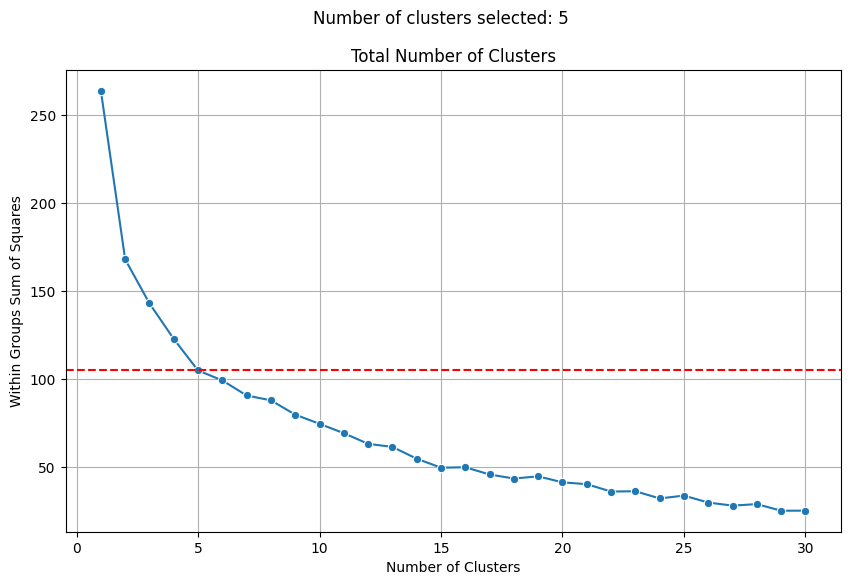

In [10]:
cluster_results.wss

In [25]:
cluster_results.cluster_ci.clusters_confidence_interval_plot

In [27]:
cluster_results.cluster_ci.cluster_confidence_interval_df

,rn,cluster,n,boot_mean,boot_se,boot_ci,ci_low,ci_up,sd,dist100
0,facebook_S,1,23,2.631317,0.420362,"[0.0, 6.8]",0.000000,6.801849,1.971672,0.108537
1,facebook_S,2,26,1.838279,0.273614,"[0.0, 4.72]",0.000000,4.721018,1.368070,0.075325
2,facebook_S,3,12,2.202504,0.168579,"[0.91, 3.48]",0.913796,3.484443,0.559115,0.037261
3,facebook_S,4,23,1.382061,0.062046,"[0.77, 2.0]",0.765542,1.999758,0.291022,0.018346
4,ooh_S,1,23,0.215563,0.038137,"[0.0, 0.6]",0.000000,0.597027,0.178879,0.009644
5,ooh_S,2,26,0.319813,0.066629,"[0.0, 1.02]",0.000000,1.017711,0.333146,0.017010
6,ooh_S,3,12,0.075790,0.007801,"[0.02, 0.14]",0.016406,0.135355,0.025871,0.001724
7,ooh_S,4,23,0.088927,0.002561,"[0.06, 0.11]",0.063380,0.114330,0.012014,0.000757
8,print_S,1,23,1.542016,0.376415,"[0.0, 5.29]",0.000000,5.286995,1.765544,0.089072
9,print_S,2,26,2.065334,0.420777,"[0.0, 6.48]",0.000000,6.479399,2.103884,0.107951


In [13]:
cluster_results.clusters_means

,cluster,facebook_S_alphas,facebook_S_gammas,facebook_S_thetas,newsletter_alphas,newsletter_gammas,newsletter_thetas,ooh_S_alphas,ooh_S_gammas,ooh_S_thetas,...,print_S_gammas,print_S_thetas,search_S_alphas,search_S_gammas,search_S_thetas,tv_S_alphas,tv_S_gammas,tv_S_thetas,mape.qt10,n
0,0,2.065519,0.642241,0.097404,0.680399,0.536435,0.357606,0.621727,0.663758,0.308022,...,0.684375,0.230596,2.317836,0.586147,0.090533,1.835009,0.669830,0.478866,1.0,18
1,1,1.943722,0.762259,0.113008,2.557162,0.873419,0.226618,0.772583,0.563109,0.322057,...,0.585777,0.204286,2.657833,0.796835,0.124656,1.831701,0.558052,0.502155,1.0,23
2,2,2.274734,0.792242,0.140455,2.261968,0.821603,0.266706,0.722357,0.415946,0.346451,...,0.548528,0.213837,2.605233,0.790394,0.103491,2.253987,0.709648,0.569678,1.0,26
3,3,1.185941,0.573032,0.108373,0.602377,0.528204,0.334142,0.828961,0.496816,0.320503,...,0.568174,0.162168,2.600017,0.738978,0.116165,1.429333,0.641685,0.496794,1.0,12
4,4,2.600298,0.590396,0.165259,0.635649,0.475105,0.360861,0.583181,0.602990,0.318084,...,0.553650,0.201526,2.515666,0.759195,0.110883,1.025998,0.807271,0.437350,1.0,23


In [20]:
print("clusters: ", cluster_results.n_clusters,
"\nerror weights/balance: ", cluster_results.errors_weights,
"\nboot_n: ", cluster_results.cluster_ci.boot_n,
"\nsim_n: ", cluster_results.cluster_ci.sim_n)


clusters:  5 
error weights/balance:  [1.0, 1.0, 1.0] 
boot_n:  1000 
sim_n:  10000


In [14]:
cluster_results.cluster_data


,solID,facebook_S_alphas,facebook_S_gammas,facebook_S_thetas,newsletter_alphas,newsletter_gammas,newsletter_thetas,ooh_S_alphas,ooh_S_gammas,ooh_S_thetas,...,nrmse_train,nrmse_val,nrmse_test,nrmse,decomp.rssd,mape,mape.qt10,cluster,n,top_sol
581,1_65_6,1.816538,0.655710,0.282243,0.977079,0.698281,0.389996,0.751347,0.802381,0.383726,...,0.232905,0.249837,0.288892,0.249837,0.536179,70.892934,True,3,12,False
1343,1_150_3,2.817883,0.997139,0.190832,0.785560,0.438935,0.390311,0.627345,0.573152,0.367050,...,0.233498,0.246141,0.296267,0.246141,0.531938,65.780731,True,4,23,False
1403,1_156_9,2.817883,0.997139,0.190832,0.514987,0.607173,0.390311,0.627345,0.573152,0.367050,...,0.233504,0.246173,0.296364,0.246173,0.531946,62.637132,True,4,23,False
1433,1_160_3,2.817883,0.997139,0.190832,0.785560,0.438935,0.390311,0.627345,0.573152,0.367050,...,0.233602,0.246686,0.298407,0.246686,0.545255,65.834692,True,4,23,False
1493,1_166_9,2.140731,0.871110,0.139164,0.698447,0.837714,0.316046,0.689707,0.476237,0.367947,...,0.233461,0.246088,0.296570,0.246088,0.540862,70.679096,True,4,23,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,5_211_9,1.278330,0.686631,0.133280,0.647806,0.414713,0.308137,0.541218,0.441688,0.313545,...,0.229273,0.252300,0.297076,0.252300,0.530409,68.648979,True,0,18,False
10006,5_220_8,2.147993,0.354322,0.015830,0.678687,0.964952,0.129028,0.571841,0.417467,0.386422,...,0.226063,0.264822,0.302831,0.264822,0.522369,69.144987,True,4,23,False
10012,5_221_5,2.924702,0.540774,0.035944,0.853590,0.693816,0.391377,0.587863,0.443449,0.268736,...,0.234521,0.244178,0.296425,0.244178,0.564497,67.902686,True,4,23,False
10016,5_221_9,1.278330,0.686631,0.133280,0.647806,0.414713,0.308137,0.541218,0.441688,0.313545,...,0.229256,0.252435,0.297507,0.252435,0.533088,68.638174,True,0,18,False


In [15]:
cluster_results.top_solutions

,cluster,rank,solID,facebook_S_alphas,facebook_S_gammas,facebook_S_thetas,newsletter_alphas,newsletter_gammas,newsletter_thetas,ooh_S_alphas,...,tv_S_thetas,nrmse_train,nrmse_val,nrmse_test,nrmse,decomp.rssd,mape,mape.qt10,n,error_score
9788,0,1.0,5_196_6,2.556395,0.434002,0.030527,0.590808,0.745019,0.333445,0.552210,...,0.611658,0.217770,0.281591,0.311595,0.281591,0.512303,53.371545,True,18,0.322126
4863,1,1.0,3_95_4,1.974575,0.971017,0.158234,2.541337,0.941835,0.139716,1.011983,...,0.602178,0.055255,0.108580,0.060833,0.108580,0.572187,0.850054,True,23,0.208612
3988,2,1.0,2_221_2,2.109582,0.603050,0.103924,2.202599,0.300985,0.386665,0.698711,...,0.752378,0.056223,0.108591,0.043918,0.108591,0.370899,0.971785,True,26,0.000759
4704,3,1.0,3_77_7,0.889766,0.598542,0.099502,0.506427,0.435874,0.351006,0.606769,...,0.493167,0.233806,0.243424,0.295446,0.243424,0.509925,66.430478,True,12,0.368299
5785,4,1.0,3_197_8,2.706660,0.448838,0.181127,0.517983,0.341020,0.390324,0.529455,...,0.360011,0.233996,0.248105,0.293347,0.248105,0.509545,58.063543,True,23,0.334637
